In [1]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import utils as utl
from datetime import datetime
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)

## Comparing different all weather portfolios

In [2]:
dictionary = {'No leverage' : ['VTI', 'VGLT', 'VGIT', 'IAU', 'PDBC'],
              'x2 leverage' : ['SSO', 'UBT', 'UST', 'DIG', 'UGL'],
              'x3 leverage' : ['UPRO', 'TMF', 'TYD']}

dictionary_util =  {'Utilities instead commodities' : ['VTI', 'VGLT', 'VGIT', 'VPU', 'IAU'], 
                    'Utilities instead commodities x3 leverage' : ['UPRO', 'TMF', 'TYD', 'UTSL'],
                    'Utilities instead commodities x2 leverage' : ['SSO', 'UBT', 'UST', 'UPW', 'UGL']}

dictionary_TRP = {'True risk parity' : ['VGLT', 'VTI', 'VGIT', 'VPU', 'IAU'],
                  'True risk parity x3 leverage' : ['TMF', 'UPRO', 'TYD', 'UTSL','UGL' ]}

In [6]:
window = 30
dict_df = {}
for name in dictionary:
    list_securities = dictionary[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
    
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    data_wheighted = hep.df_wheighted(inv_volat_data)
    data_earnings = hep.df_earnings(data_wheighted, data_perc)
    #data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
    data_earnings.dropna(inplace = True)
    data_earnings = data_earnings[-1834:] #1834 len of the no leverage portfolio
    #data_earn_eq_weight.dropna(inplace = True)
    #display(data_earn_eq_weight)
    dict_df[name] = data_earnings

['VTI', 'VGLT', 'VGIT', 'IAU', 'PDBC']
['SSO', 'UBT', 'UST', 'DIG', 'UGL']
['UPRO', 'TMF', 'TYD']


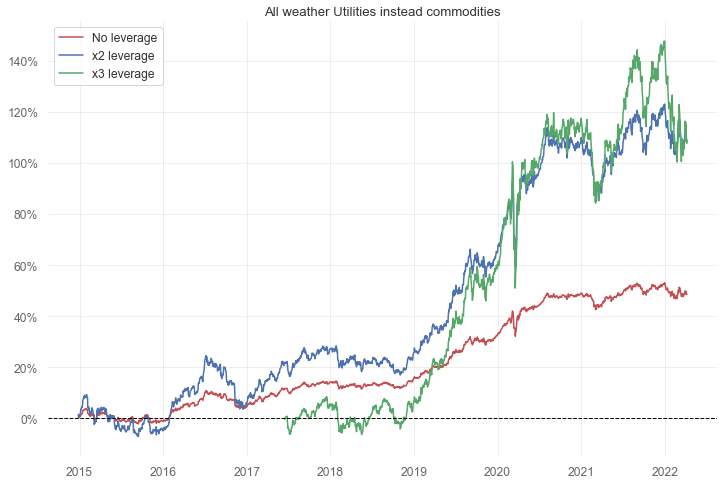

In [5]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('All weather Utilities instead commodities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_df['No leverage']['Tot']), lw=1.5, label='No leverage', color='r', alpha=1)
ax.plot(compsum(dict_df['x2 leverage']['Tot']), lw=1.5, label='x2 leverage', color='b', alpha=1)
ax.plot(compsum(dict_df['x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('./img/all_weather_compare_leverage')

In [10]:
window = 30
dict_util_df = {}
for name in dictionary_util:
    list_securities = dictionary_util[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
    
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    data_wheighted = hep.df_wheighted(inv_volat_data)
    data_earnings = hep.df_earnings(data_wheighted, data_perc)
    #data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
    data_earnings.dropna(inplace = True)
    data_earnings = data_earnings[-1834:] #1834 len of the no leverage portfolio

    #data_earn_eq_weight.dropna(inplace = True)
    #display(data_earn_eq_weight)
    dict_util_df[name] = data_earnings

['VTI', 'VGLT', 'VGIT', 'VPU', 'IAU']
['UPRO', 'TMF', 'TYD', 'UTSL']
['SSO', 'UBT', 'UST', 'UPW', 'UGL']


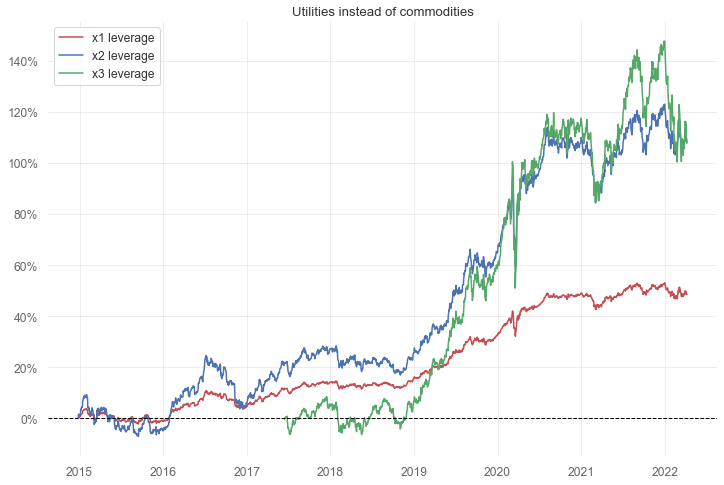

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Utilities instead of commodities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_util_df['Utilities instead commodities']['Tot']), lw=1.5, label='x1 leverage', color='r', alpha=1)
ax.plot(compsum(dict_util_df['Utilities instead commodities x2 leverage']['Tot']), lw=1.5, label='x2 leverage', color='b', alpha=1)
ax.plot(compsum(dict_util_df['Utilities instead commodities x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
plt.savefig('./img/all_weather_utilities_no_commodities_compare_leverage')

In [36]:
window = 30
dict_TRP_df = {}
for name in dictionary_TRP:
    list_securities = dictionary_TRP[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
    
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    data_wheighted = hep.df_wheighted(inv_volat_data)
    data_earnings = hep.df_earnings(data_wheighted, data_perc)
    #data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
    data_earnings.dropna(inplace = True)
    #data_earn_eq_weight.dropna(inplace = True)
    #display(data_earn_eq_weight)
    dict_TRP_df[name] = data_earnings

['VGLT', 'VTI', 'VGIT', 'VPU', 'IAU']
['TMF', 'UPRO', 'TYD', 'UTSL', 'UGL']


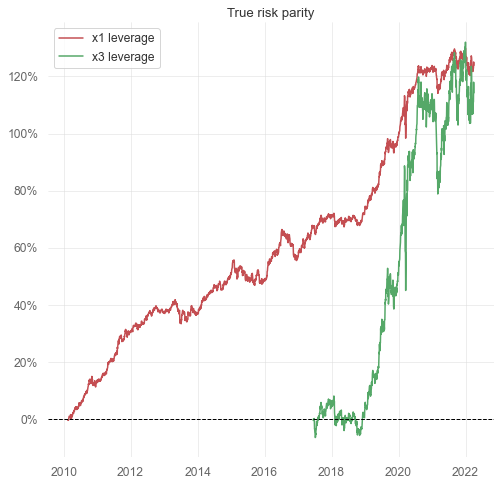

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('True risk parity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_TRP_df['True risk parity']['Tot']), lw=1.5, label='x1 leverage', color='r', alpha=1)
ax.plot(compsum(dict_TRP_df['True risk parity x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
plt.savefig('./img/all_weather_true_risk_parity_compare_leverage')